In [1]:
import pandas as pd
from pepfun import *

import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from statistics import stdev
from scipy import stats

In [2]:
#load data with the right format, specially the header
data_raw = pd.read_csv('GAN_original_results.csv')
data_gan = pd.read_csv('GAN_results.csv')

In [4]:
raw_gan= data_raw.sample(1000)
raw_gan.head()


,proteins,hydrophobicity,solubility_rules,synthesis_rules
2533,YMITVIVGLIIHGAIFLPCIYFAIVRKNPFSFFMGIFQAWITALGT...,0.382970,2,109
4289,MQREEGFNTKMADGPDEYDTEAGCVPLLHPEEIKPQSHYNHGYGEP...,0.119557,3,258
3136,MKKVWIGIGIAVIVALFVGINIYRSAAPTSGSAGKEVQTGSVEENE...,-0.103607,2,77
6627,MSYSLYLAFVCLNLLAQRMCIQGNQFNVEVSRSDKLSLPGFENLTA...,0.108023,3,180
10368,MSAHAGSGAAGDAGAARADDEALALLPASAPGGDHGDGGSSSGREE...,0.246984,2,276


In [5]:
raw_gan.to_csv('gan_raw.csv')

In [6]:
gen_gan = data_gan.sample(1000)

(1000, 5)

In [7]:
#save set of samples used
gen_gan.to_csv('gan_generated.csv')

In [8]:
#protein sequences to analyse with pepfun
sequences = raw_gan['proteins']

2533     YMITVIVGLIIHGAIFLPCIYFAIVRKNPFSFFMGIFQAWITALGT...
4289     MQREEGFNTKMADGPDEYDTEAGCVPLLHPEEIKPQSHYNHGYGEP...
3136     MKKVWIGIGIAVIVALFVGINIYRSAAPTSGSAGKEVQTGSVEENE...
6627     MSYSLYLAFVCLNLLAQRMCIQGNQFNVEVSRSDKLSLPGFENLTA...
10368    MSAHAGSGAAGDAGAARADDEALALLPASAPGGDHGDGGSSSGREE...
                               ...                        
7113     MSALTRLASFARVGGRLFRSGCARTAGDGGVRHAGGGVHIEPRYRQ...
9764     MEIERESSERGSISWRASAAHDQDAKKLDADDQLLMKEPAWKRFLA...
1261     MSSTAVQPPPPVPPPPPSAVPSAGKGIHSKLYNGMIGAADKFVPAK...
3200     MGFKLNPFSKKPKDEEPLPLEQYEASEQKILGLVTKKEAKLLAIAG...
12294    MPPAVGGPVGYTPPDGGWGWAVVIGAFISIGFSYAFPKSITVFFKE...
Name: proteins, Length: 1000, dtype: object


In [9]:
# List with the properties
charges=[]
weights=[]
logps=[]
hydro=[]

# Loop over the sequences
for seq in sequences:
    # Create the object and run the calculations
    pep=peptide_sequence(seq)
    pep.compute_peptide_charges()
    pep.calculate_properties_from_mol()
    pep.calculate_properties_from_sequence()
    
    # Append the properties to the lists
    charges.append(pep.netCharge)
    weights.append(pep.mol_weight)
    logps.append(pep.mol_logp)
    hydro.append(pep.avg_hydro)

print("The number of peptides with properties calculated is: {}".format(len(charges)))

The number of peptides with properties calculated is: 1000


In [10]:
chargesData=np.array(charges).astype(np.float)

C:\Users\migue\Anaconda3\envs\pepfun-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


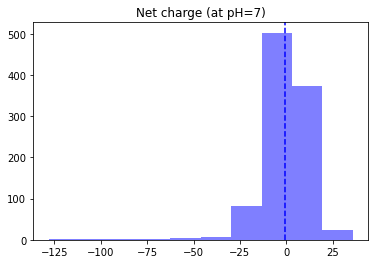

<Figure size 432x288 with 0 Axes>

In [11]:
plt.hist(chargesData, alpha=0.5, color='b', linewidth=0)
plt.axvline(x=mean(charges), color='b', linestyle='--')
plt.title('Net charge (at pH=7)')
plt.show()
plt.savefig('charge_raw.png')

In [12]:
sequences = gen_gan['proteins']

In [13]:
# List with the properties
charges=[]
weights=[]
logps=[]
hydro=[]

# Loop over the sequences
for seq in sequences:
    # Create the object and run the calculations
    pep=peptide_sequence(seq)
    pep.compute_peptide_charges()
    pep.calculate_properties_from_mol()
    pep.calculate_properties_from_sequence()
    
    # Append the properties to the lists
    charges.append(pep.netCharge)
    weights.append(pep.mol_weight)
    logps.append(pep.mol_logp)
    hydro.append(pep.avg_hydro)

print("The number of peptides with properties calculated is: {}".format(len(charges)))

The number of peptides with properties calculated is: 1000


In [14]:
chargesData=np.array(charges).astype(np.float)

C:\Users\migue\Anaconda3\envs\pepfun-env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
